In [75]:
from pathlib import Path

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd


In [55]:
raw_data = Path('/Volumes/krauss/Lisa/GMR/Array/SpecialBox/Cuthbert/250709_full_analysis/results/communicating_results.csv')

In [56]:
df = pd.read_csv(raw_data)
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.set_index("timestamp", inplace=True)
df.head()

,ROI-label,Analysis-method,amplitude,mu,sigma,offset,error
timestamp,,,,,,,
2025-07-09 14:31:25.475665,001A_N,gaussian,127.373,88.512,47.836,3.774,10.725
2025-07-09 14:31:25.475665,001A_S,gaussian,124.834,105.642,44.954,1.709,9.478
2025-07-09 14:31:25.475665,002A_N,gaussian,128.678,120.924,46.546,1.741,11.053
2025-07-09 14:31:25.475665,002A_S,gaussian,120.880,113.675,41.995,-0.492,7.855
2025-07-09 14:31:25.475665,003A_N,gaussian,135.184,113.035,48.347,-0.174,8.778


In [64]:
rois = df["ROI-label"].unique()
rois = sorted(list(set([roi[:-2] for roi in rois])))
print(rois)
print(len(rois))

['001A', '001B', '002A', '002B', '003A', '003B', '004A', '004B', '005A', '005B', '006A', '006B', '007A', '007B', '011A', '011B', '012A', '012B', '013A', '013B', '014A', '014B', '015A', '015B', '016A', '016B', '017A', '017B', '018A', '021A', '021B', '022A', '022B', '023A', '023B', '024A', '024B', '025A', '025B', '026A', '026B', '027A', '027B', '031A', '031B', '032A', '032B', '033A', '033B', '034A', '034B', '035A', '035B', '036A', '036B', '037A', '037B', '038A', '040A', '040B', '041A', '041B', '042A', '042B', '043A', '043B', '044A', '044B', '045A', '045B', '046A', '046B', '047A', '047B', '050A', '050B', '051A', '051B', '052A', '052B', '053A', '053B', '054A', '054B', '055A', '055B', '056A', '056B', '057A', '057B', '058A', '060A', '060B', '061A', '061B', '062A', '062B', '063A', '063B', '064A', '064B', '065A', '065B', '066A', '066B', '067A', '067B', '070A', '070B', '071A', '071B', '072A', '072B', '073A', '073B', '074A', '074B', '075A', '075B', '076A', '076B', '077A', '077B', '078A', '080A',

In [65]:
new_cols = {}
suffix = ['_N', '_S']
final_index = None

for roi in rois:
    df_N = df[df["ROI-label"] == f"{roi}{suffix[0]}"]["mu"]
    df_S = df[df["ROI-label"] == f"{roi}{suffix[1]}"]["mu"]
    if not df_N.empty and not df_S.empty:
        combined_series = df_N.reset_index(drop=True) + df_S.reset_index(drop=True)
        new_cols[roi] = combined_series

        if final_index is None:
            final_index = df_N.index

comb_df = pd.DataFrame(new_cols)

if final_index is not None:
    comb_df.index = final_index

comb_df.head()

,001A,001B,002A,002B,003A,003B,004A,004B,005A,005B,...,193B,194A,194B,195A,195B,196A,196B,197A,197B,198A
timestamp,,,,,,,,,,,,,,,,,,,,,
2025-07-09 14:31:25.475665,194.154,98.820,234.599,87.079,217.172,101.180,228.531,91.341,242.883,119.031,...,67.085,156.991,82.033,178.355,68.930,168.895,78.496,166.626,50.953,198.507
2025-07-09 14:31:46.595359,196.472,99.858,230.074,89.232,215.705,98.680,229.412,95.494,243.106,119.082,...,61.150,154.984,84.960,176.458,70.306,166.869,81.602,172.124,59.338,191.701
2025-07-09 14:32:05.460268,197.229,94.460,230.270,87.363,214.761,97.921,231.453,98.869,249.750,118.024,...,66.465,156.156,85.116,176.424,69.484,168.241,75.590,166.547,49.171,193.977
2025-07-09 14:32:24.220224,196.743,92.842,231.354,88.321,214.053,100.265,231.638,91.666,245.462,119.916,...,59.197,156.389,84.301,177.659,71.886,171.238,77.290,171.258,53.371,191.973
2025-07-09 14:32:43.039956,196.550,103.629,231.555,97.298,217.296,98.772,229.859,98.853,243.509,116.870,...,61.375,152.171,70.864,175.628,70.908,169.313,82.043,165.164,56.084,194.123


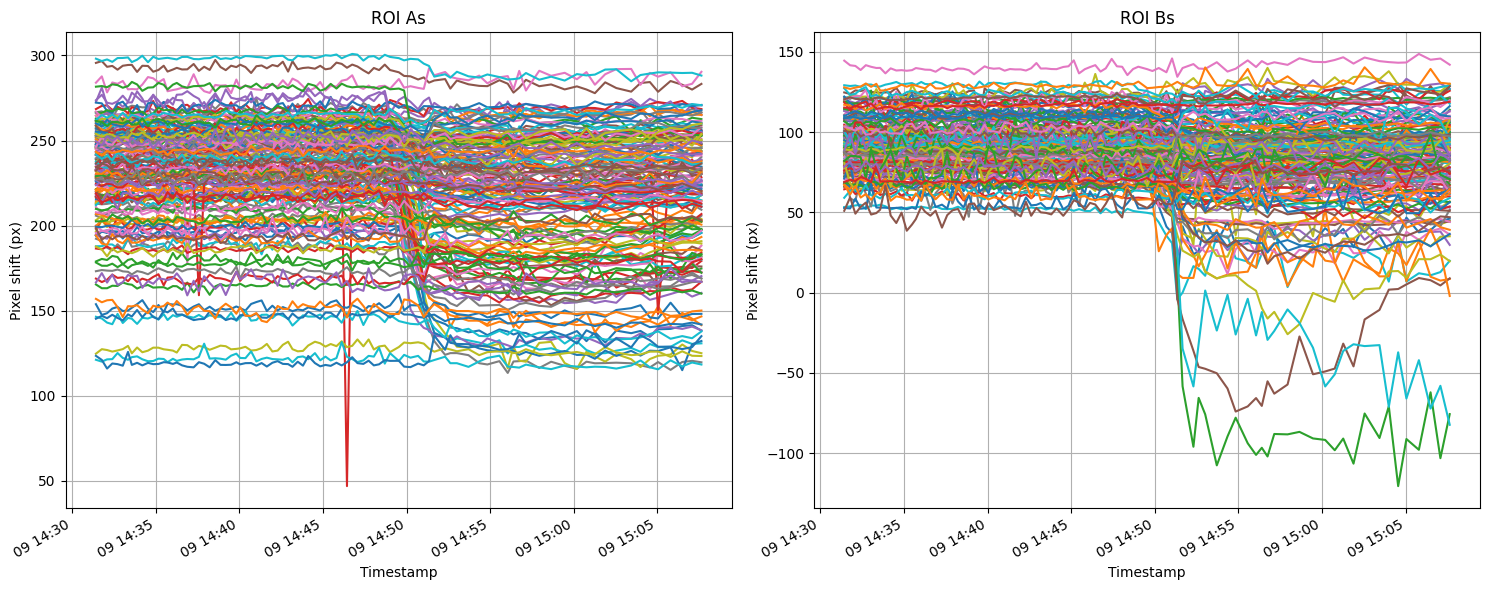

In [66]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

comb_df.loc[:, comb_df.columns.str.contains('A')].plot(
    kind='line',
    ax=ax[0],
    legend=False,
    title='ROI As',
    xlabel='Timestamp',
    ylabel='Pixel shift (px)'
)

comb_df.loc[:, comb_df.columns.str.contains('B')].plot(
    kind='line',
    ax=ax[1],
    legend=False,
    title='ROI Bs',
    xlabel='Timestamp',
    ylabel='Pixel shift (px)'
)

ax[0].grid(True) # Add a grid for better readability
ax[1].grid(True) # Add a grid for better readability
plt.tight_layout()
plt.show()

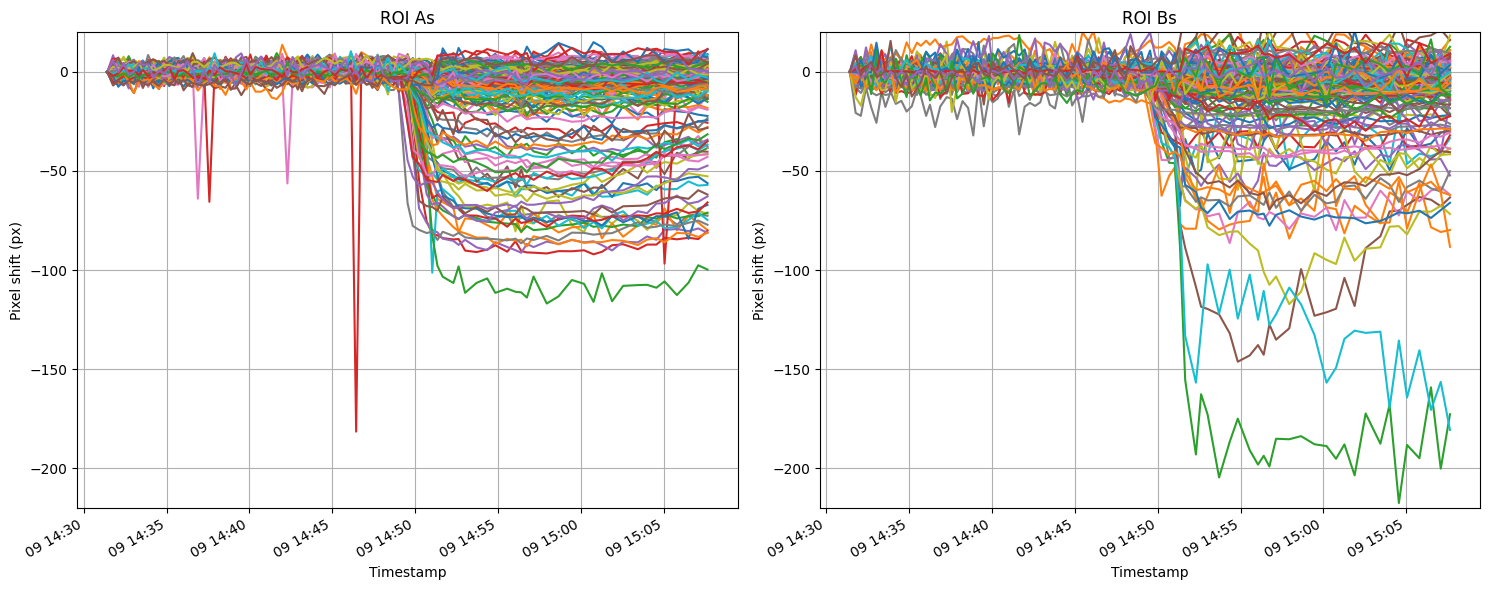

In [67]:
normalized_df = comb_df - comb_df.iloc[0]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

normalized_df.loc[:, normalized_df.columns.str.contains('A')].plot(
    kind='line',
    ylim=(-220, 20),
    ax=ax[0],
    legend=False,
    title='ROI As',
    xlabel='Timestamp',
    ylabel='Pixel shift (px)'
)

normalized_df.loc[:, normalized_df.columns.str.contains('B')].plot(
    kind='line',
    ylim=(-220, 20),
    ax=ax[1],
    legend=False,
    title='ROI Bs',
    xlabel='Timestamp',
    ylabel='Pixel shift (px)'
)

ax[0].grid(True) # Add a grid for better readability
ax[1].grid(True) # Add a grid for better readability
plt.tight_layout()
plt.show()

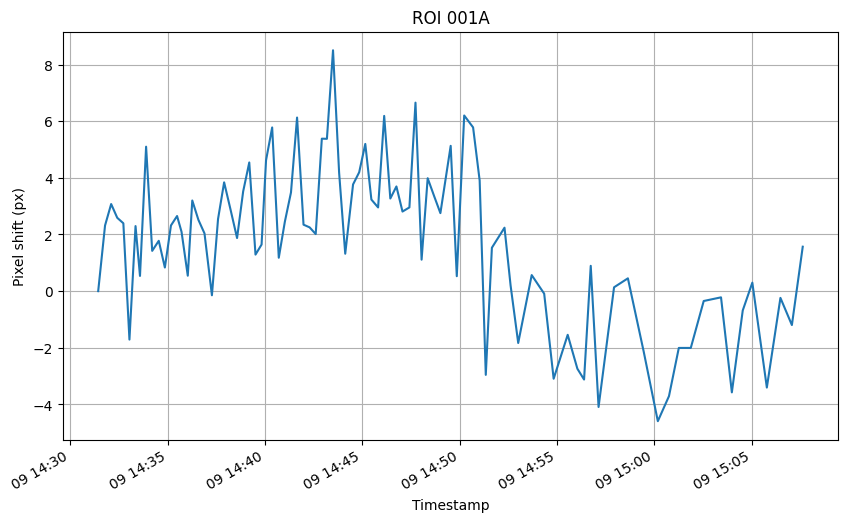

In [68]:
label = "001A"

normalized_df[label].plot(
    kind='line',
    figsize=(10, 6),
    title=f'ROI {label}',
    xlabel='Timestamp',
    ylabel='Pixel shift (px)'
)

plt.grid(True) # Add a grid for better readability
plt.show()

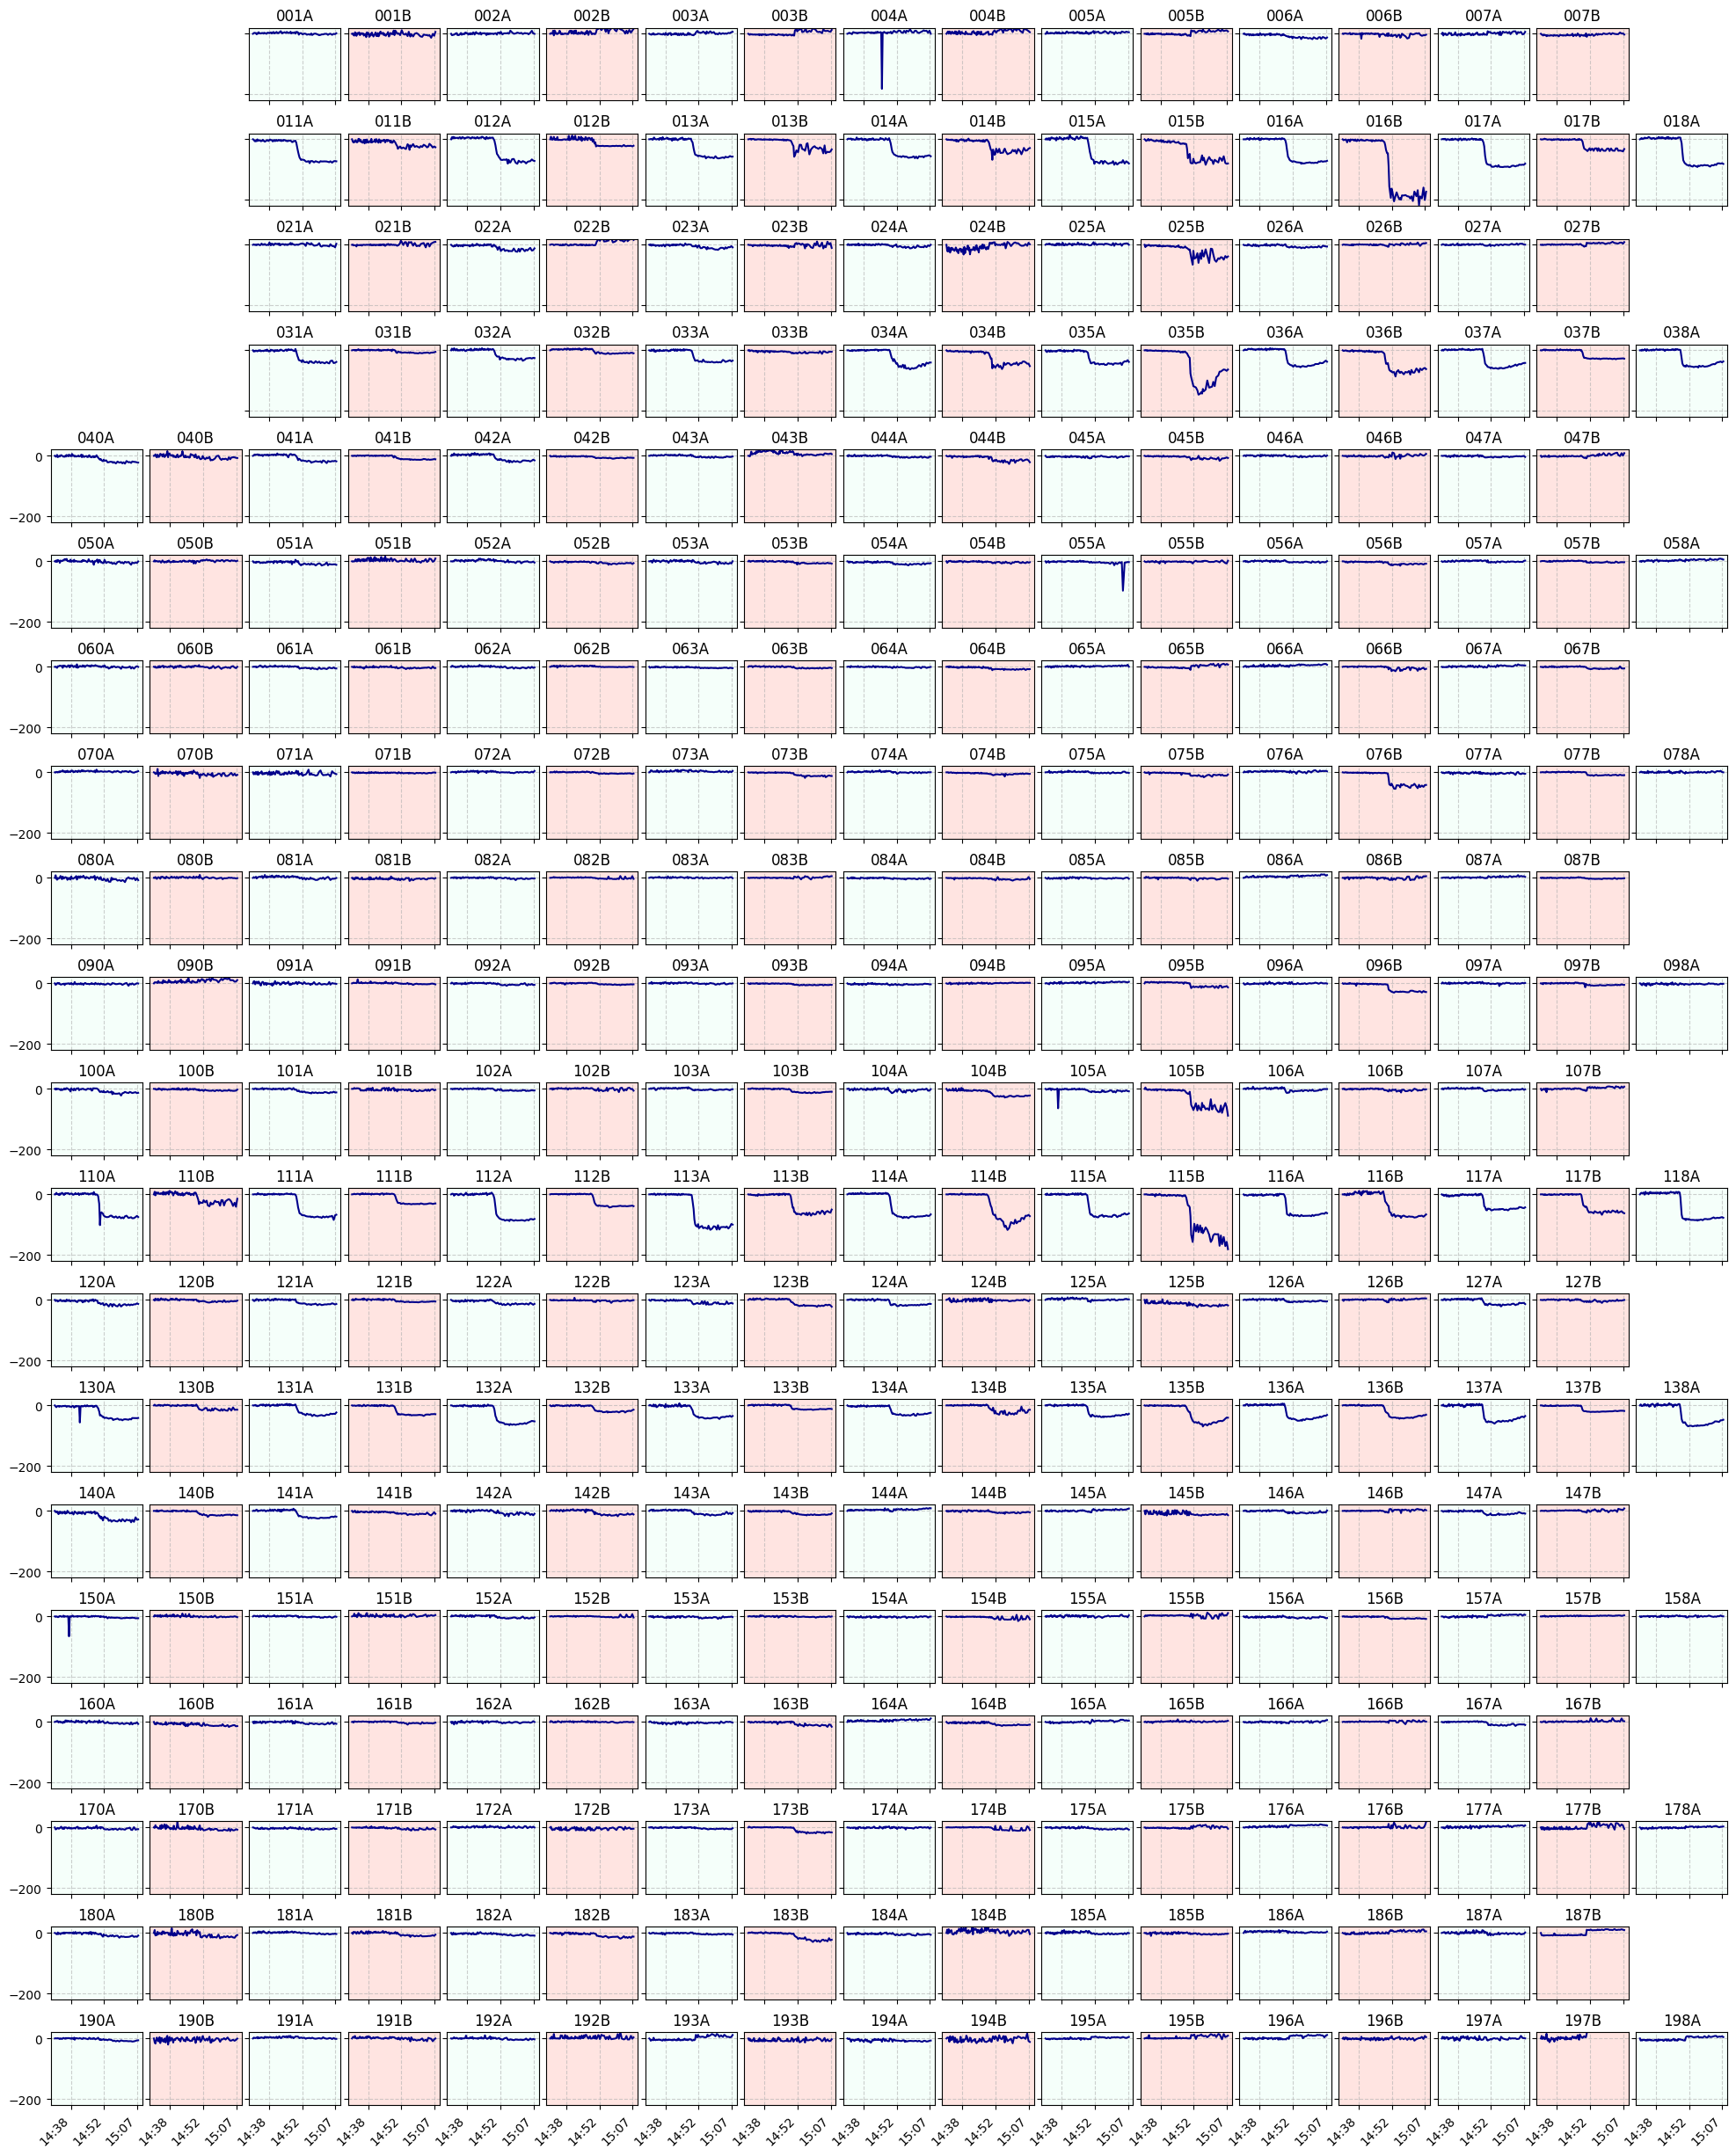

In [ ]:
roi_x_nums = sorted(list(set([roi[2:] for roi in rois])))
roi_y_nums = sorted(list(set([roi[:2] for roi in rois])))

fig, ax = plt.subplots(len(roi_y_nums), len(roi_x_nums),
                       figsize=(20, 30),
                       sharex=True,
                       sharey=True)

# fig.supxlabel("Timestamp")
# fig.supylabel("Pixel shift (px)")

plt.ylim(-220, 20)
ax[0, 0].xaxis.set_major_locator(mticker.MaxNLocator(nbins=3))
time_formatter = mdates.DateFormatter('%H:%M')
ax[-1, 0].xaxis.set_major_formatter(time_formatter)

type_colours = {'A': 'mintcream', 'B': 'mistyrose'}
# type_colours = {'A': 'honeydew', 'B': 'seashell'}
# type_colours = {'A': 'honeydew', 'B': 'snow'}
ax = ax.flatten()

# Turn off all axes
for a in ax:
    a.axis('off')

x_values = normalized_df.index
count = 0
for y in roi_y_nums:
    for x in roi_x_nums:
        roi_label = f"{y}{x}"
        type_part = roi_label[-1]
        try:
            y_values = normalized_df[roi_label].values
            ax[count].plot(x_values, y_values, color='darkblue')
            ax[count].axis('on')
            ax[count].set_facecolor(type_colours.get(type_part, 'white'))
            ax[count].set_title(roi_label)
            ax[count].grid(True, linestyle='--', alpha=0.6)
        except KeyError:
            pass
        count += 1

plt.tight_layout()
fig.subplots_adjust(wspace=0.08, hspace=0.45)
fig.autofmt_xdate(rotation=45)
# plt.savefig("Array_data.png", dpi=300)

In [80]:
plt.savefig("Array_data.png", dpi=300)

<Figure size 640x480 with 0 Axes>